In [1]:
import sys
sys.path.append('..')
import gluonbook as gb
from mxnet import autograd, gluon, nd

n_train = 20
n_test = 100

num_inputs = 200
true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

features = nd.random.normal(shape=(n_train+n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

In [6]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

In [7]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [8]:
batch_size = 1
num_epochs = 10
lr = 0.003

net = gb.linreg
loss = gb.squared_loss
%config InlineBackend.figure_format = 'retina'
gb.plt.rcParams['figure.figsize'] = (3.5, 2.5)

def fit_and_plot(lambd):
    w, b = params = init_params()
    train_ls = []
    test_ls = []
    for _ in range(num_epochs):
        for X, y in gb.data_iter(batch_size, n_train, features, labels):
            with autograd.record():
                # 添加了 L2 范数惩罚项。
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            gb.sgd(params, lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),
                            test_labels).mean().asscalar())
    gb.semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'loss',
                range(1, num_epochs+1), test_ls, ['train', 'test'])
    return 'w[:10]:', w[:10].T, 'b:', b

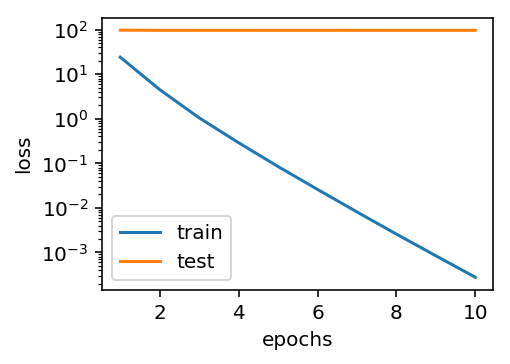

('w[:10]:', 
 [[ 0.30334792 -0.08137776  0.6478958  -1.515957    0.16550829  0.42074385
    0.41169763  0.8321022  -0.664654    3.5623271 ]]
 <NDArray 1x10 @cpu(0)>, 'b:', 
 [0.12518626]
 <NDArray 1 @cpu(0)>)

In [9]:
fit_and_plot(lambd=0)

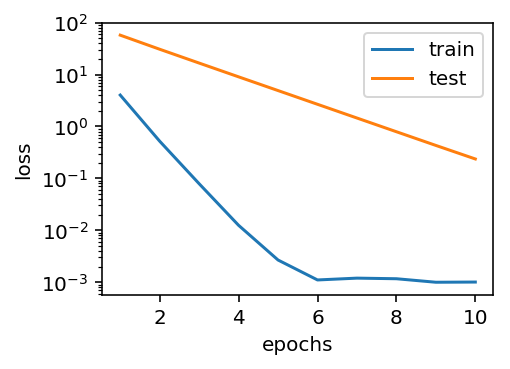

('w[:10]:', 
 [[ 0.07450299  0.0402029  -0.07624244 -0.00939899 -0.05782568  0.04079275
    0.09290858 -0.04932325  0.02624848 -0.03722811]]
 <NDArray 1x10 @cpu(0)>, 'b:', 
 [0.10713126]
 <NDArray 1 @cpu(0)>)

In [10]:
fit_and_plot(lambd=5)

In [11]:
true_w


[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]